# Evaluation
We will now evaluate the results of the models to see if we can form a conclusion on how the activation function affects the models of different depths.

In [1]:
import pickle
import matplotlib.pyplot as plt

In [2]:
depth = [1,3,5,10]
activation = ['tanh','RELU','Swish']

## Approach 1 (10%, 1 classification)
We retrieve the results from HPC and import them into the program.

In [3]:
with open('../data/processed/scores','rb') as f:
    scores = pickle.load(f)

In [4]:
test_acc=[]
train_acc=[]
test_auc=[]
train_auc=[]
avg=[]
total=[]
for i in range(len(scores)):
    (test_score_acc, train_score_acc, test_score_auc, train_score_auc, avg_time, total_time) = scores[i]
    test_acc.append(test_score_acc)
    train_acc.append(train_score_acc)
    test_auc.append(test_score_auc)
    train_auc.append(train_score_auc)
    avg.append(avg_time)
    total.append(total_time)

### Accuracy and AUC

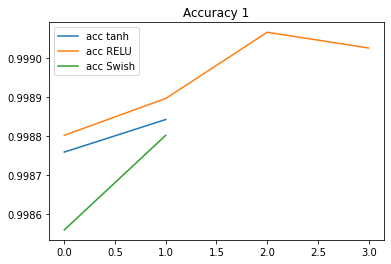

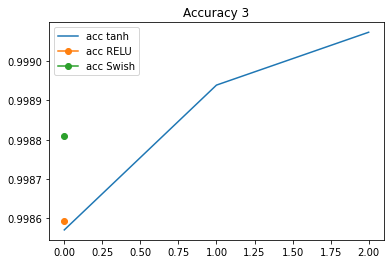

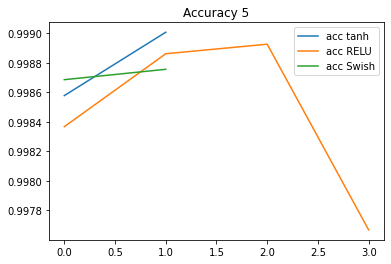

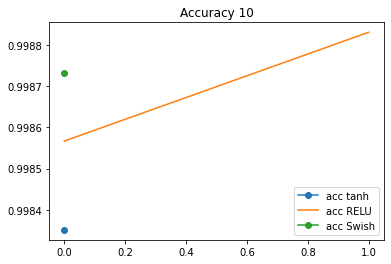

In [5]:
for i in range(4):
    for j in range(3):
        k=(i*3)+j
        if (len(test_acc[k]) > 1): #if there is only one point the ouput a dot, otherwise output the line
            plt.plot(range(len(test_acc[k])),test_acc[k],label='acc ' + activation[j])
        else:
            plt.plot(0,test_acc[k], marker='o',label='acc ' + activation[j])
    plt.legend()
    plt.title('Accuracy ' + str(depth[i]))
    plt.show()

Here we can see that there is little absolute difference between the accuracy of the 3 activation functions for each depth, however this is expected due the nature of Neural Networks being so effective in such problems. Unfortunately, as there are only a few epcohs, it makes it hard to evaluate a long term trend. What we can say from the data is that Swish performs worst across the board, although it appears that the effectiveness of the Swish function is increased with a greater depth. It is hard to form an analysis with the other functions as there is much more variation in performance across the depths.

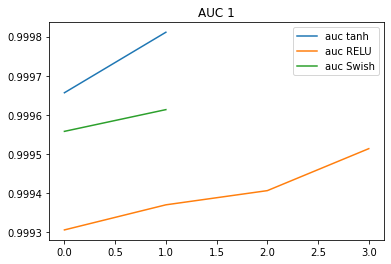

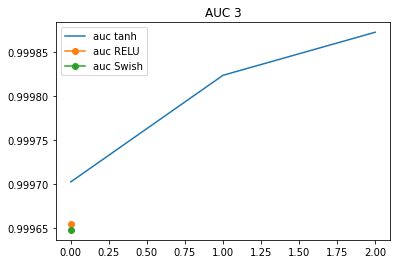

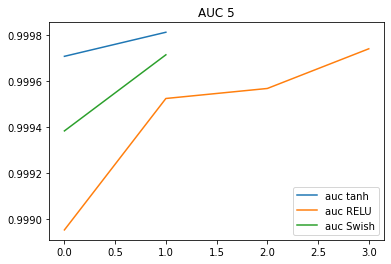

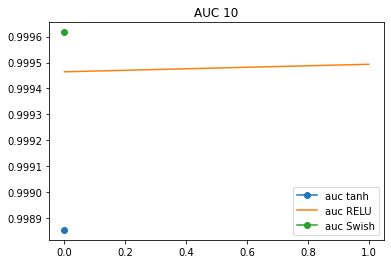

In [6]:
for i in range(4):
    for j in range(3):
        k=(i*3)+j
        if (len(test_auc[k]) > 1): #if there is only one point the ouput a dot, otherwise output the line
            plt.plot(range(len(test_auc[k])),test_auc[k],label='auc ' + activation[j])
        else:
            plt.plot(0,test_auc[k], marker='o',label='auc ' + activation[j])
    plt.legend()
    plt.title('AUC ' + str(depth[i]))
    plt.show()

Here the tanh function appears to provide the best AUC score, although in the model of depth 10 it performs worst. This could be an indication that it does worse with deeper networks, but this is far from conclusive. RELU appears to be the worst performing function across the depths although is not far worse than Swish. Here RELU appears to perform better with deeper models.

### Times

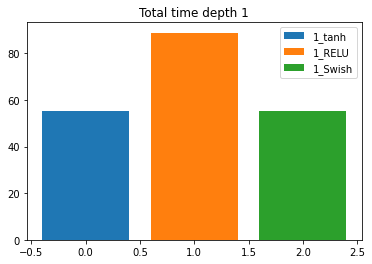

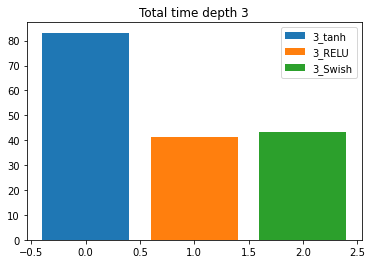

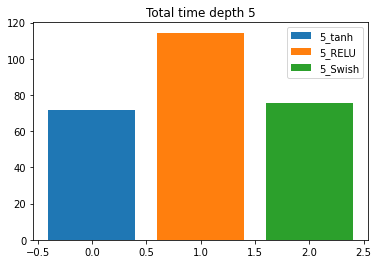

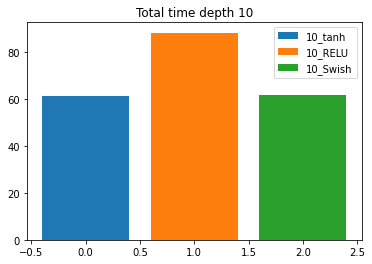

In [7]:
for i in range(4):
    for j in range(3):
        k=(i*3)+j
        plt.bar(j, total[k], label= str(depth[i]) + '_' + activation[j])
    plt.legend()
    plt.title('Total time depth '+ str(depth[i]))
    plt.show()

Here we can see that the RELU function took longer to train the models than the other two functions. The other two functions had reasonably similar times.

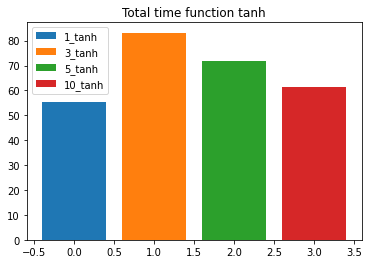

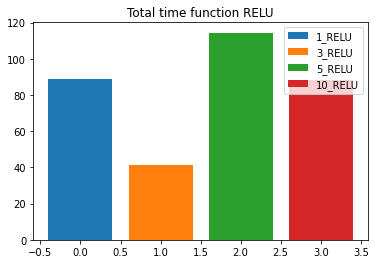

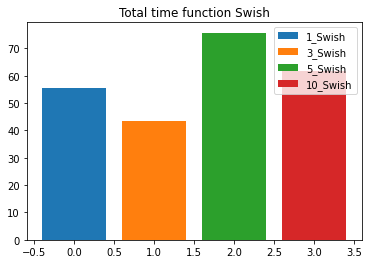

In [8]:
for j in range(3):
    for i in range(4):
        k=(i*3)+j
        plt.bar(i, total[k], label= str(depth[i]) + '_' + activation[j])
    plt.legend()
    plt.title('Total time function '+ activation[j])
    plt.show()

There is little correlation between the time taken and the depth of the models for each function. On another note, it appears that models of depth 3 are quickest to triain. The excpetion here being tanh but given how much quicker the other functions were on 3, this is likely an anomaly. It also appears that models of depth 5 are the slowest to train. 

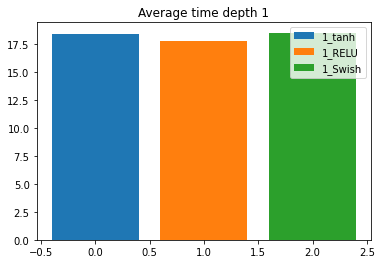

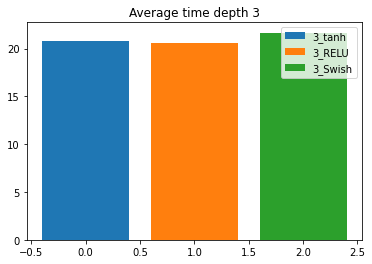

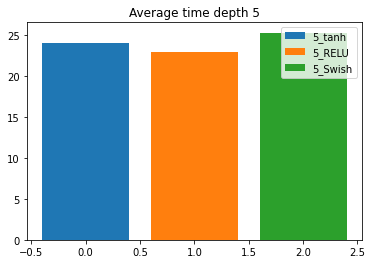

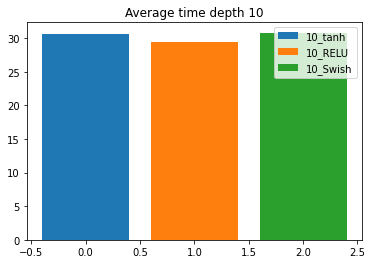

In [9]:
for i in range(4):
    for j in range(3):
        k=(i*3)+j
        plt.bar(j, avg[k], label= str(depth[i]) + '_' + activation[j])
    plt.legend()
    plt.title('Average time depth '+ str(depth[i]))
    plt.show()

Here RELU is consistnetly the quickest of the three functions with tanh second and Swish the slowest across the average time to train the model for 1 epoch. However, the time difference is minimal but consistent.

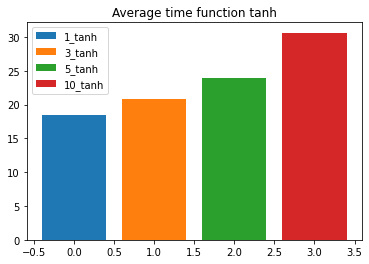

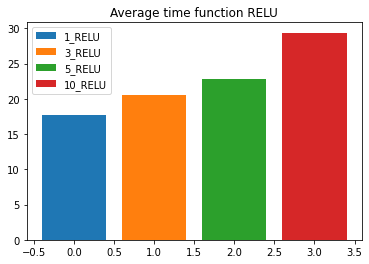

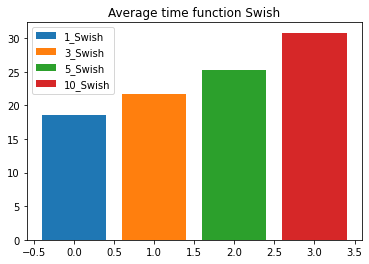

In [10]:
for j in range(3):
    for i in range(4):
        k=(i*3)+j
        plt.bar(i, avg[k], label= str(depth[i]) + '_' + activation[j])
    plt.legend()
    plt.title('Average time function '+ activation[j])
    plt.show()

For each of the functions the depth of the models clearly increases the average time of training the model for a single epoch.

### Conclusion
The tanh function appears to have performed best because across accuracy and AUC it performs the best, while having reasonably fast learning. The RELU and Swish perform roughly similarly across the accuracy and AUC metrics, however RELU is consistently much slower than Swish in total time. We did have that RELU was slightly faster in a single training epoch so RELU required more epochs to train the model. However, there are no real discernable trends of the performance of the models across the depths for each function.

Here we can see that the scores are so close that we can not gain enough data from this. We will look at the full data set.

## Approach 2 (100%, 1 classification)
We retrieve the results from HPC and import them into the program.

In [11]:
with open('../data/processed/scores1','rb') as f:
    scores = pickle.load(f)
test_acc1=[]
train_acc1=[]
test_auc1=[]
train_auc1=[]
avg1=[]
total1=[]
for i in range(len(scores)):
    (test_score_acc, train_score_acc, test_score_auc, train_score_auc, avg_time, total_time) = scores[i]
    test_acc1.append(test_score_acc)
    train_acc1.append(train_score_acc)
    test_auc1.append(test_score_auc)
    train_auc1.append(train_score_auc)
    avg1.append(avg_time)
    total1.append(total_time)

## Accuracy and AUC

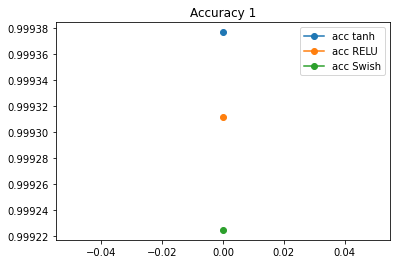

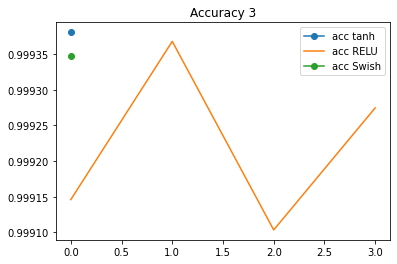

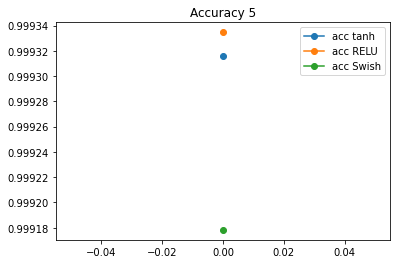

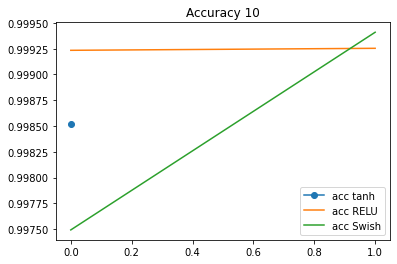

In [12]:
for i in range(4):
    for j in range(3):
        k=(i*3)+j
        if (len(test_acc1[k]) > 1): #if there is only one point the ouput a dot, otherwise output the line
            plt.plot(range(len(test_acc1[k])),test_acc1[k],label='acc ' + activation[j])
        else:
            plt.plot(0,test_acc1[k], marker='o',label='acc ' + activation[j])
    plt.legend()
    plt.title('Accuracy ' + str(depth[i]))
    plt.show()

Here tanh appears to do best across the board, however in the model of depth 10 it does the worst of the functions, possibly indicating that it does worse with a greater depths. We have that RELU is fairly accurate across all depths and is quite consistent. Whereas Swish is quite inconsistent either performing well or badly. 

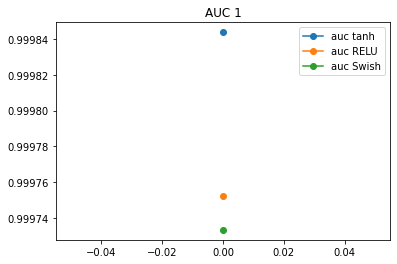

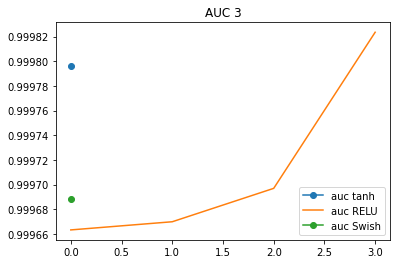

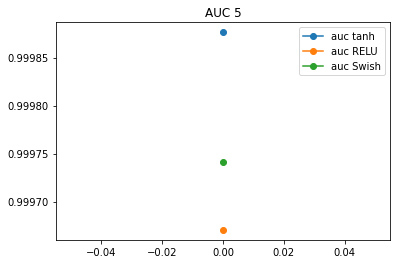

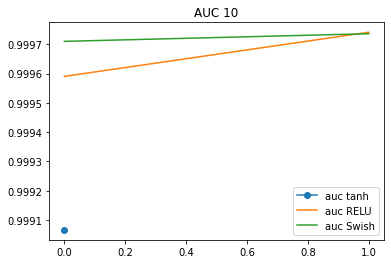

In [13]:
for i in range(4):
    for j in range(3):
        k=(i*3)+j
        if (len(test_auc1[k]) > 1): #if there is only one point the ouput a dot, otherwise output the line
            plt.plot(range(len(test_auc1[k])),test_auc1[k],label='auc ' + activation[j])
        else:
            plt.plot(0,test_auc1[k], marker='o',label='auc ' + activation[j])
    plt.legend()
    plt.title('AUC ' + str(depth[i]))
    plt.show()

Similar to the accuracy, the tanh function does very well across the board except in depth 10. RELU again performs second best across the board with exception of depth 5. Swish does not particularly perform well when compared to the other functions, although does improve the greater the depth of model.

### Times

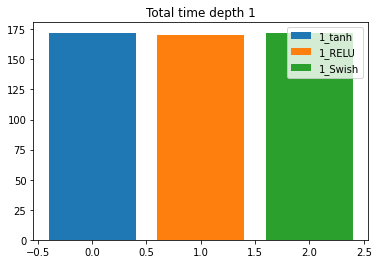

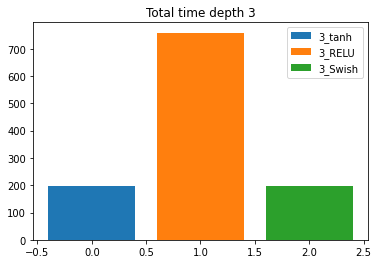

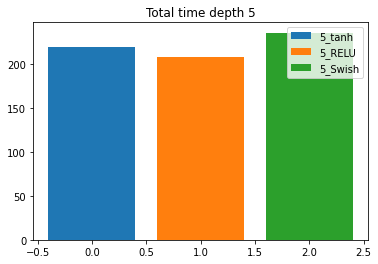

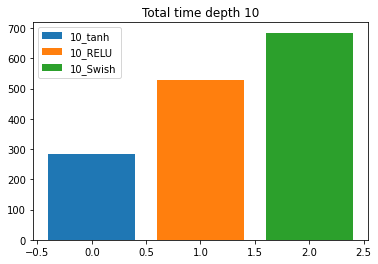

In [14]:
for i in range(4):
    for j in range(3):
        k=(i*3)+j
        plt.bar(j, total1[k], label= str(depth[i]) + '_' + activation[j])
    plt.legend()
    plt.title('Total time depth '+ str(depth[i]))
    plt.show()

There is little trend with regards to the functions at each depth except that tanh does well across the board.

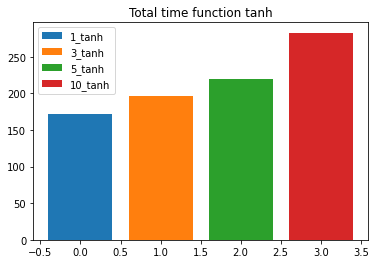

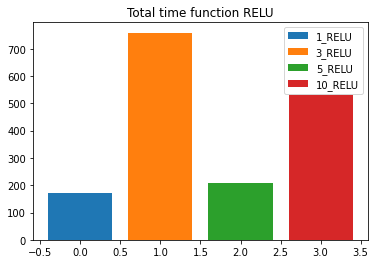

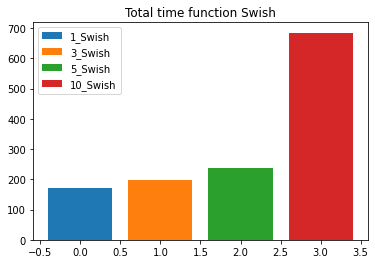

In [15]:
for j in range(3):
    for i in range(4):
        k=(i*3)+j
        plt.bar(i, total1[k], label= str(depth[i]) + '_' + activation[j])
    plt.legend()
    plt.title('Total time function '+ activation[j])
    plt.show()

From here it is fairly obvious that the total time to train a model is positively correlated with the depth of the model. This highlights that RELU at depth 3 is likely an anomalous result. 

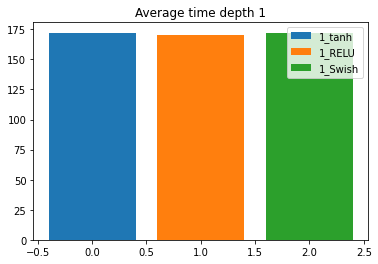

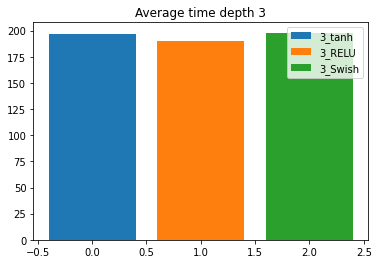

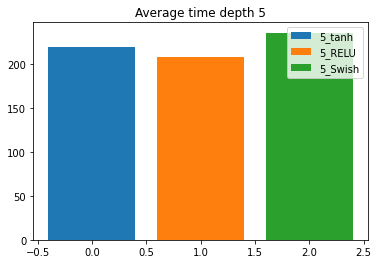

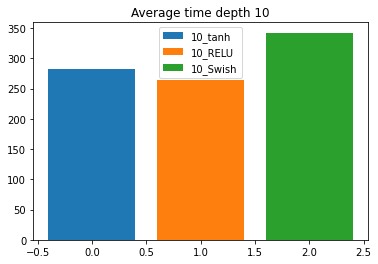

In [16]:
for i in range(4):
    for j in range(3):
        k=(i*3)+j
        plt.bar(j, avg1[k], label= str(depth[i]) + '_' + activation[j])
    plt.legend()
    plt.title('Average time depth '+ str(depth[i]))
    plt.show()

Here the functions have little but consistent differences in the time taken in training each epoch. RELU is quickest and Swish the slowest, with the differences becoming more noticable with a greater depth of model. 

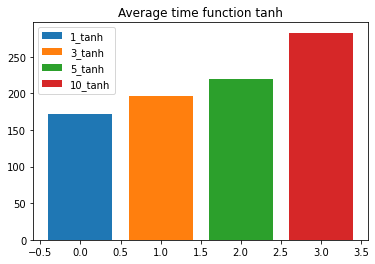

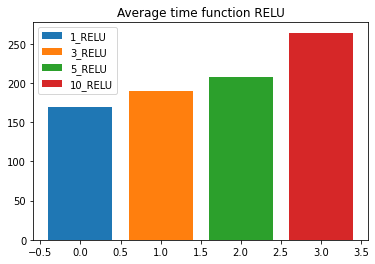

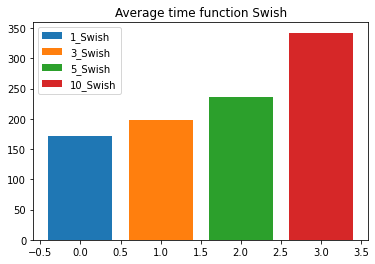

In [17]:
for j in range(3):
    for i in range(4):
        k=(i*3)+j
        plt.bar(i, avg1[k], label= str(depth[i]) + '_' + activation[j])
    plt.legend()
    plt.title('Average time function '+ activation[j])
    plt.show()

For each of the functions the depth of the models clearly increases the average time of training the model for a single epoch.

### Conclusion
Here we have that tanh appears to be the best function for this data set with generably best accuracy and AUC while being fairly quick. However, there is a possible trend that with a greater depth the effectiveness of the function is deminished. Swish performed worst across the accuracy and AUC and wasn't particularly quick overall and was indeed slowest across the average epoch. Finally, RELU performed second best across the accuracy and AUC and was fastest for the average epoch but was not particularly quick across the total time taken to train. RELU did not have an obvious trend in performance with respect to depth of the model. 

## Approach 3 (100%, 5 classifications)
We retrieve the results from HPC and import them into the program.

In [18]:
with open('../data/processed/scores2','rb') as f:
    scores = pickle.load(f)
test_acc2=[]
train_acc2=[]
test_auc2=[]
train_auc2=[]
avg2=[]
total2=[]
norm_mat2=[]
dos_mat2=[]
u2r_mat2=[]
r2l_mat2=[]
probe_mat2=[]
for i in range(len(scores)):
    (test_score_acc, train_score_acc, test_score_auc, train_score_auc, avg_time, total_time, test_norm_mat, test_dos_mat, test_u2r_mat, test_r2l_mat, test_probe_mat) = scores[i]
    test_acc2.append(test_score_acc)
    train_acc2.append(train_score_acc)
    test_auc2.append(test_score_auc)
    train_auc2.append(train_score_auc)
    avg2.append(avg_time)
    total2.append(total_time)
    norm_mat2.append(test_norm_mat)
    dos_mat2.append(test_dos_mat)
    u2r_mat2.append(test_u2r_mat)
    r2l_mat2.append(test_r2l_mat)
    probe_mat2.append(test_probe_mat)

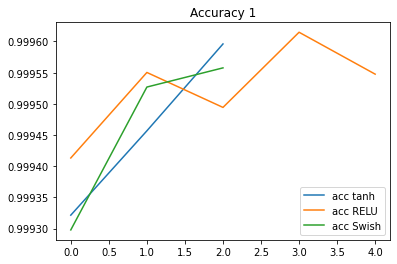

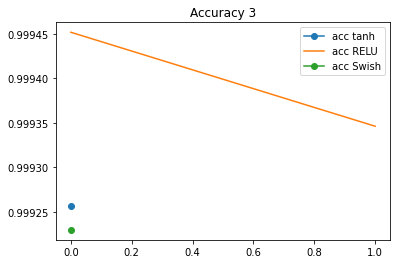

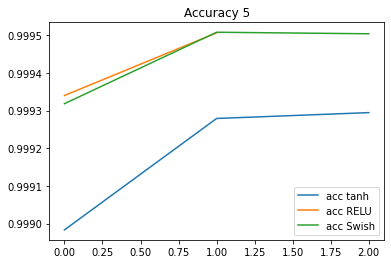

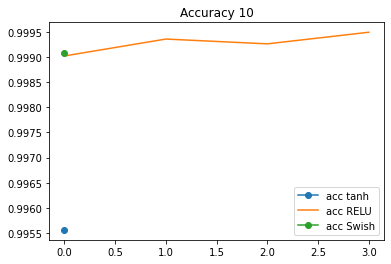

In [19]:
for i in range(4):
    for j in range(3):
        k=(i*3)+j
        if (len(test_acc2[k]) > 1): #if there is only one point the ouput a dot, otherwise output the line
            plt.plot(range(len(test_acc2[k])),test_acc2[k],label='acc ' + activation[j])
        else:
            plt.plot(0,test_acc2[k], marker='o',label='acc ' + activation[j])
    plt.legend()
    plt.title('Accuracy ' + str(depth[i]))
    plt.show()

Here we have that tanh performs the worst across the board and becomes less effective with a greater depth of model. RELU performs best across the board and is consistently very accurate, Swish also performs well across the board excpet in the model of depth 3. There is no pattern to how RELU and Swish change the accuracy as the depth of the model changes. 

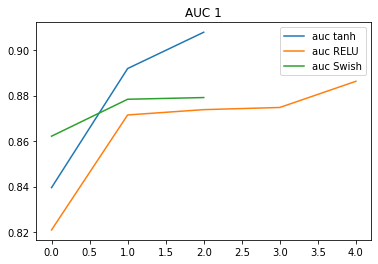

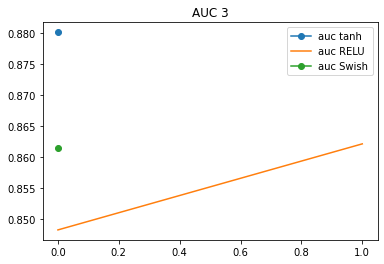

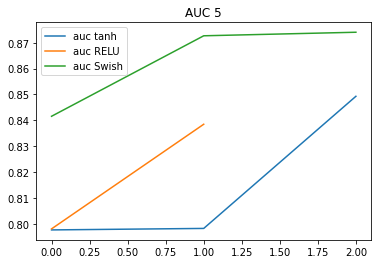

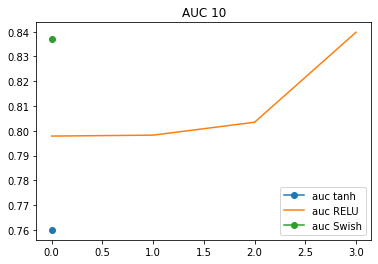

In [20]:
for i in range(4):
    for j in range(3):
        k=(i*3)+j
        if (len(test_auc2[k]) > 1): #if there is only one point the ouput a dot, otherwise output the line
            plt.plot(range(len(test_auc2[k])),test_auc2[k],label='auc ' + activation[j])
        else:
            plt.plot(0,test_auc2[k], marker='o',label='auc ' + activation[j])
    plt.legend()
    plt.title('AUC ' + str(depth[i]))
    plt.show()

The tanh function has quite an obvious pattern of getting worse with greater depth of model, going from having the highest AUC in depth 1 and 3 and moving to the worst in depth 10. Swish has the pattern of getting better as the depth increases, while RELU does not have a clear trend and gerenally does second best at any depth. 

### Times

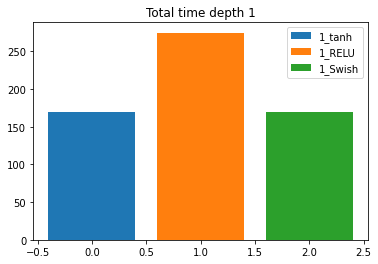

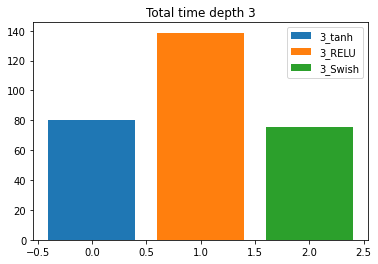

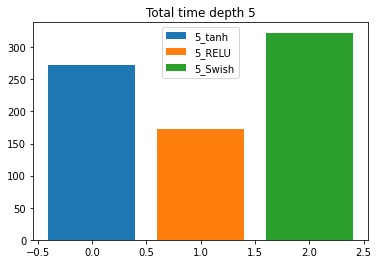

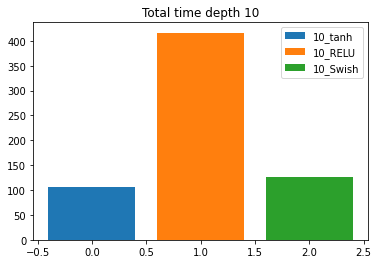

In [21]:
for i in range(4):
    for j in range(3):
        k=(i*3)+j
        plt.bar(j, total2[k], label= str(depth[i]) + '_' + activation[j])
    plt.legend()
    plt.title('Total time depth '+ str(depth[i]))
    plt.show()

Here RELU consistently takes the greatest total time to train by a large quanity except in the case of depth 5 which is likely an anomaly. Swish and tanh have very similar total times across each depth.

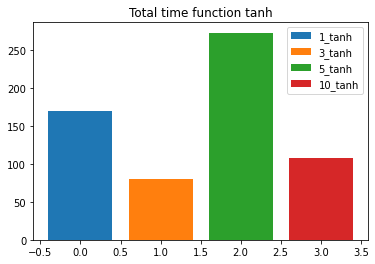

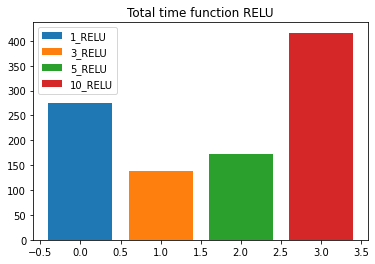

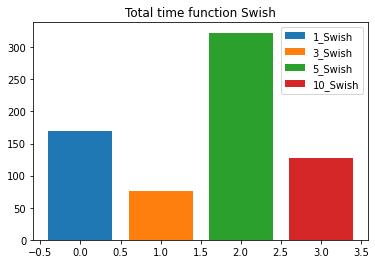

In [22]:
for j in range(3):
    for i in range(4):
        k=(i*3)+j
        plt.bar(i, total2[k], label= str(depth[i]) + '_' + activation[j])
    plt.legend()
    plt.title('Total time function '+ activation[j])
    plt.show()

It is hard to parse any particular patterns beyond depth 3 is always quickest and depth 1 is second slowest. It is possible that RELU has the pattern of increaing total time with an increase in depth, which would be expected due to the greater complexity of the model. 

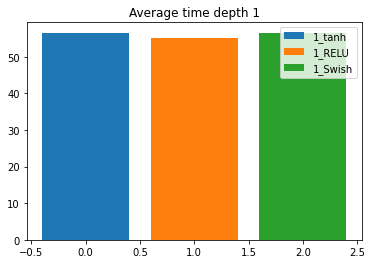

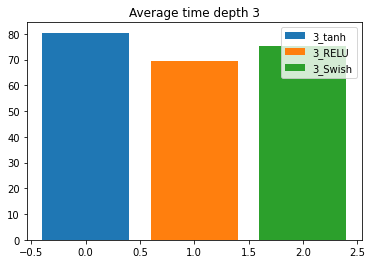

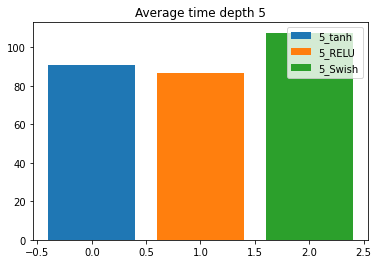

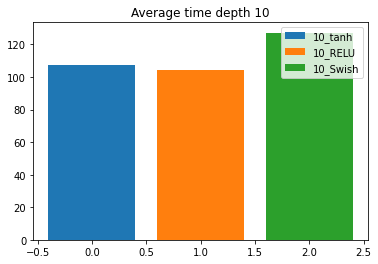

In [23]:
for i in range(4):
    for j in range(3):
        k=(i*3)+j
        plt.bar(j, avg2[k], label= str(depth[i]) + '_' + activation[j])
    plt.legend()
    plt.title('Average time depth '+ str(depth[i]))
    plt.show()

The results at each depth are all consistent with RELU quickest and Swish the slowest of the functions on average.

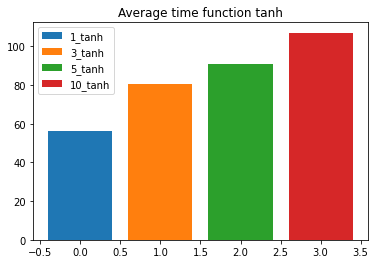

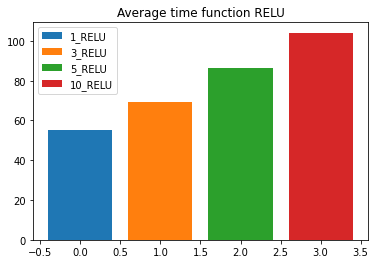

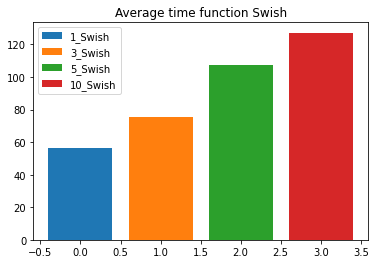

In [24]:
for j in range(3):
    for i in range(4):
        k=(i*3)+j
        plt.bar(i, avg2[k], label= str(depth[i]) + '_' + activation[j])
    plt.legend()
    plt.title('Average time function '+ activation[j])
    plt.show()

For each of the functions the depth of the models clearly increases the average time of training the model for a single epoch.

### Individual classifcations

In [25]:
print(norm_mat2[0])
print(u2r_mat2[0])
print(r2l_mat2[0])
print(dos_mat2[0])
print(probe_mat2[0])

[[2943539     765]]
[[3673778       0]]
[[3672838     127]]
[[760958    462]]
[[3642770      55]]


I wanted to analyse the confusion matrices of each of the classicfications to see if there was a difference in performance across the functions, however the hpc program has not saved the data correctly and so we will not be able to perform an analysis on this. 

### Conclusion
We have that the tanh function gets worse as the depth increases and is reasonably quick across each epoch and in total training time. RELU does not seem to have a particular preference for depth however, while it is quickest across each epoch it takes much more total time to train the model. Finally, Swish performs best with a deeper model while also being consistently quick, it is the slowest across an individual epoch although this is a small absolute difference. 